<a href="https://colab.research.google.com/github/tegacodess/calorie-predictor/blob/main/Calorie_burnout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
dataset = pd.read_csv('Exercise.csv')

In [ ]:
dataset.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


### Data Understanding


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


- height unit = cm
- weight unit = kg

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5
Calories,15000.0,8.953953e+01,6.245698e+01,1.0,35.00,79.0,138.00,314.0


In [ ]:
dataset[dataset['Calories']==1.0]

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
645,18594088,male,20,184,84,1,76,37.8,1
1788,15883945,male,24,173,70,1,79,37.7,1
2056,16118167,male,21,180,76,1,74,37.6,1
2058,10235459,male,22,183,84,1,76,37.8,1
2135,11155609,male,25,194,93,2,69,37.9,1
2705,16176008,male,24,160,61,1,77,37.7,1
2732,14946022,male,28,166,66,2,72,38.0,1
3873,17012358,male,30,192,92,1,72,37.7,1
4923,13263146,male,24,178,77,1,76,38.0,1
8671,18281150,male,20,182,81,1,75,37.5,1


In [ ]:
dataset.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [ ]:
num_cols = ['Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories']

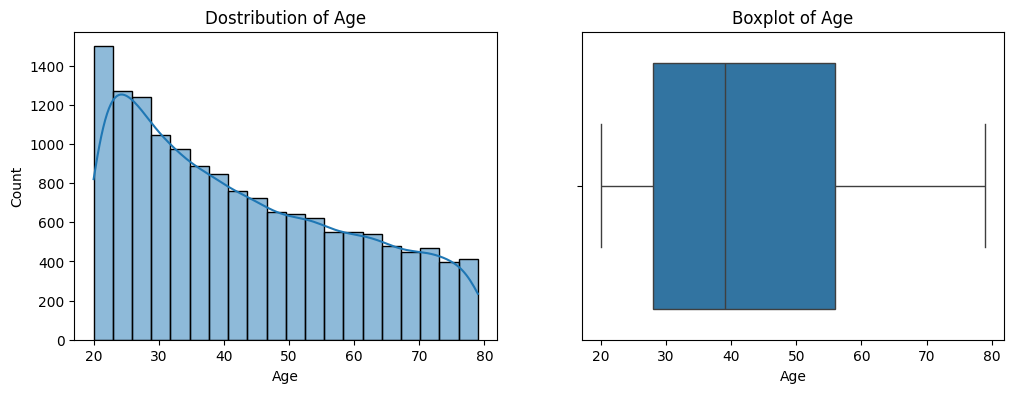

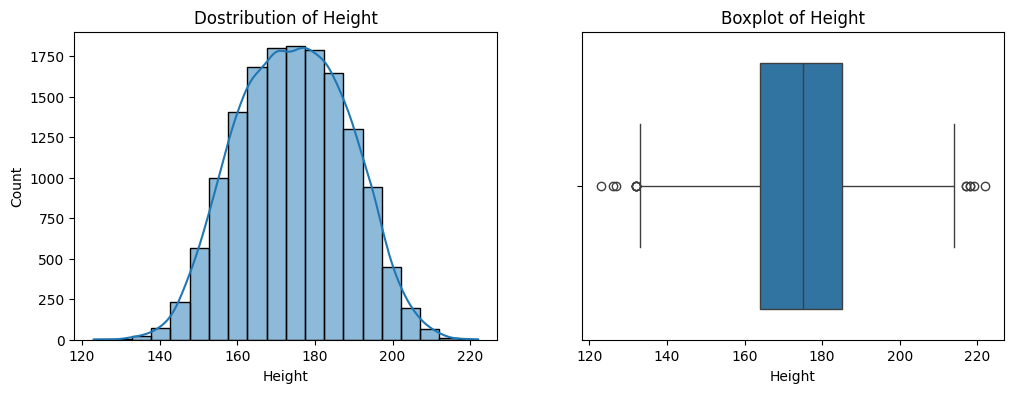

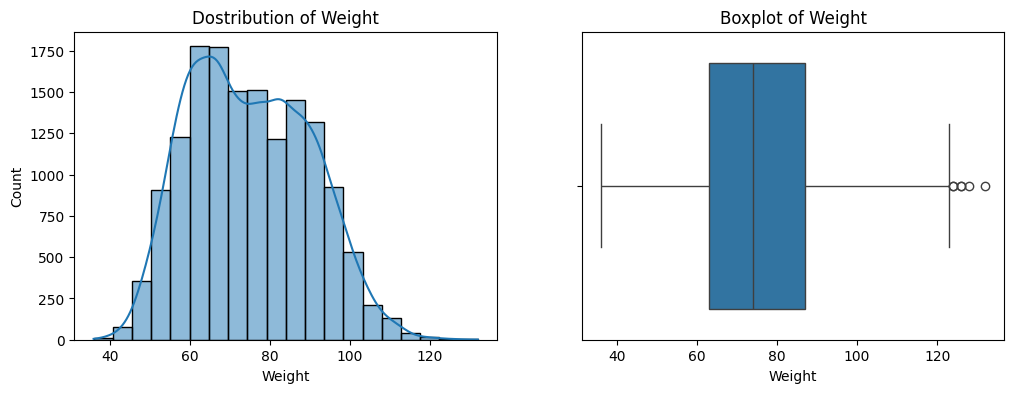

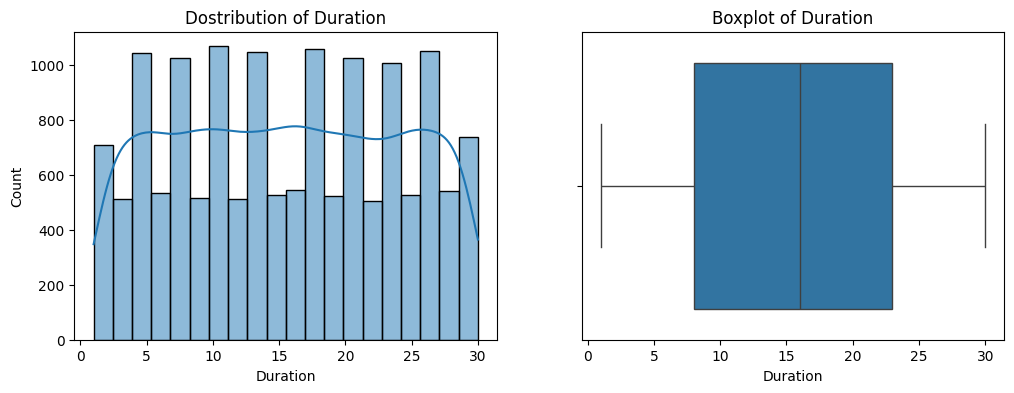

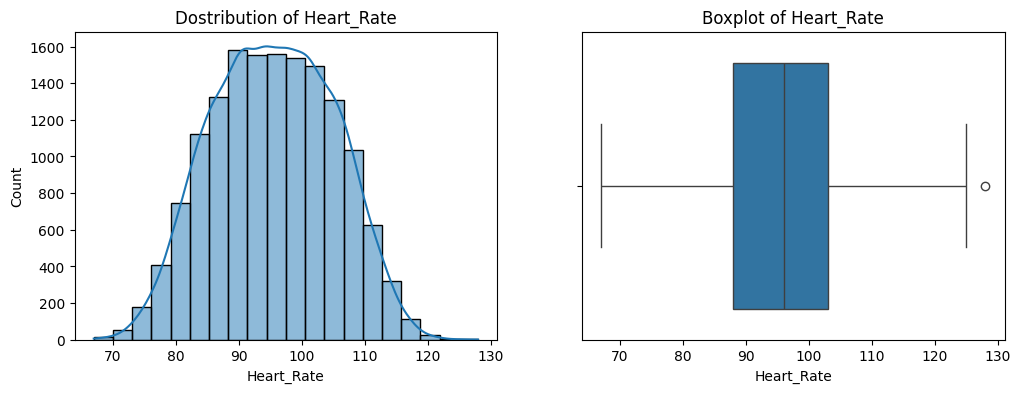

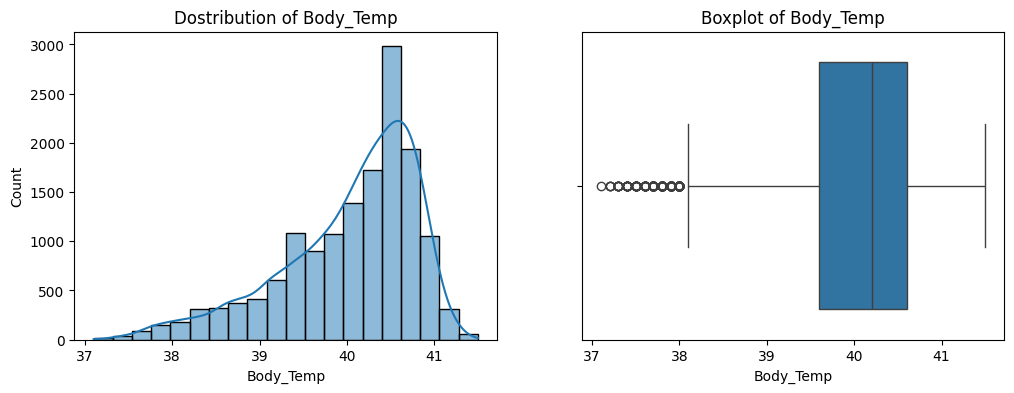

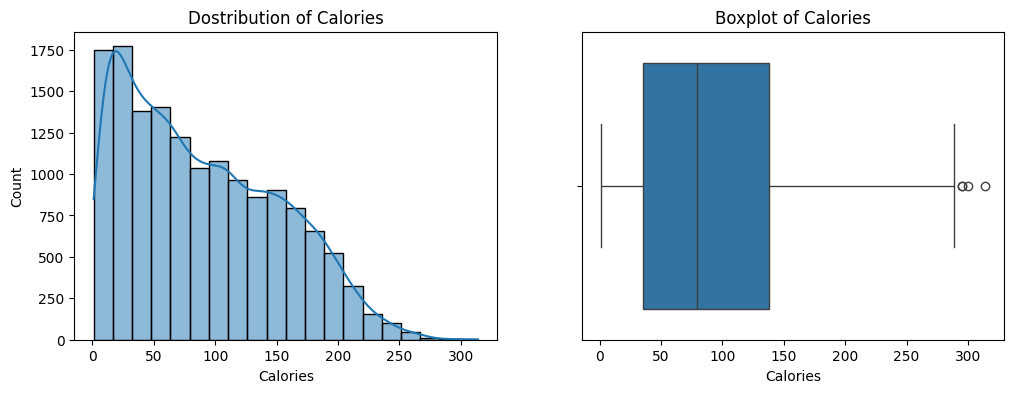

In [ ]:
# visualize distribution of num cols
for col in num_cols:
  plt.figure(figsize = (12,4))
  # Histogram
  plt.subplot(1,2,1)
  sns.histplot(data=dataset[col], kde=True, bins=20)
  plt.title(f'Dostribution of {col}')


  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=dataset[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

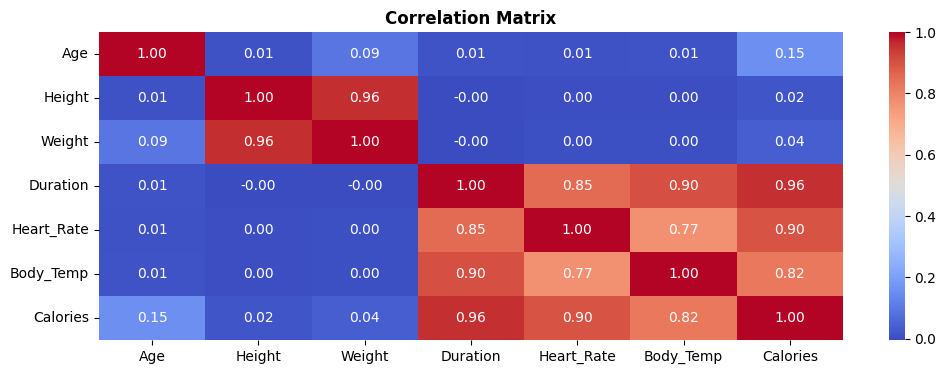

In [ ]:
# correlation matrix of num cols
plt.figure(figsize = (12,4))
heatmap = dataset[num_cols].corr()
sns.heatmap(data=heatmap, fmt='.2f',annot= True, cmap='coolwarm')
plt.title('Correlation Matrix', fontweight='bold')
plt.show()

In [ ]:
# Remind Mr Matthew to teach (solving multicollinearity)
# - VIF a way to solve multicollinearity
# - Principal component analysis
# - deal with outliers
# transform target columns
#  - hyper parameter tuning

### Feature Construction
BMI = weight/(height)^2

In [ ]:
# convert from cm to m, then calculate bmi
dataset['BMI'] = dataset['Weight']/(dataset['Height']/100)**2

In [ ]:
dataset.sample(7)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI
12797,12087297,female,21,168,63,15,96,40.1,73,22.321429
13415,18611473,female,67,177,74,30,105,41.0,195,23.620288
14052,11277633,male,34,184,78,19,97,40.5,91,23.038752
1405,10906559,male,21,193,92,20,108,40.5,122,24.698650
1949,16347135,female,54,162,59,24,114,40.8,179,22.481329
8878,12074880,female,43,167,58,29,106,41.1,186,20.796730
14326,18478250,male,59,188,90,7,85,39.2,31,25.464011


In [ ]:
# do feature engineering (bmi category, age ranges, etc) hile practicing


def bmi_category (BMI):
  if BMI <= 18.5:
    return 'Underweight'
  elif BMI >= 18.6 and BMI <= 24.9:
    return 'Normal Weight'
  elif BMI >= 25 and BMI <= 30:
    return 'Overweight'
  elif BMI >= 30.1:
    return 'Obese'

dataset['BMI Category'] = dataset['BMI'].apply(bmi_category)

# age group
def age_group(age):
  if age <= 12:
    return 'Child'
  elif 13 <= age <= 18:
     return 'Adolescence'
  elif 19 <= age <= 59:
    return 'Adult'
  else:
    return 'Senior Adult'

dataset['Age Groups'] = dataset['Age'].apply(age_group)

In [ ]:
dataset['Age Groups'].unique()

array(['Senior Adult', 'Adult'], dtype=object)

### Data preparation

In [ ]:
dataset.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories', 'BMI', 'BMI Category',
       'Age Groups'],
      dtype='object')

In [ ]:
x = dataset.drop(columns=['User_ID', 'Calories'])
y =dataset['Calories']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=64)

In [ ]:
# seperate into numeric and cat cols

num_cols = ['Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'BMI']
cat_cols = ['Gender', 'BMI Category', 'Age Groups']


### Create a pipeline

a pipeline enables you to see

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder #the preprocessors
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# a pipeline for the data preprocessing

num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [ ]:
# apply the preprocessing

preprocessor = ColumnTransformer(transformers=[
   ( 'num', num_pipeline, num_cols),
     ('cat', cat_pipeline,cat_cols)
])

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age', 'Height', 'Weight', 'Duration',
                                  'Heart_Rate', 'Body_Temp', 'BMI']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Gender', 'BMI Category', 'Age Groups'])])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error
# add support vecotr machine models, kmeans? model and other ones

In [ ]:
# define model
models = {
    'Linear regression' : LinearRegression(),
'decision tree': DecisionTreeRegressor(random_state = 64),
'random forest': RandomForestRegressor(random_state=64),
' Gradient Boost': GradientBoostingRegressor(random_state=64)
}

In [ ]:
# fit and evaluate model
for name, model in models.items():
  pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor ),
    ('model', model)
  ])

  # train the model
  pipeline.fit(x_train, y_train)

  # predict and evaluate

  # evaluate with rmse, and mae
  y_pred = pipeline.predict(x_test)
  mse = mean_squared_error(y_pred, y_test)
  rmse = root_mean_squared_error(y_pred, y_test)
  mae = mean_absolute_error(y_pred, y_test)
  score = r2_score(y_pred, y_test)

  print(f'{name}: Mse = {mse}, R-squared = {score},RMSE = {rmse}, MAE = {mae}' )
  # put it in a dictionary, and let it display in a tabular formula


Linear regression: Mse = 118.50908665852695, R-squared = 0.9686437504779368,RMSE = 10.886187884586915, MAE = 8.022541581781223
decision tree: Mse = 29.558, R-squared = 0.9924764484098203,RMSE = 5.43672695654288, MAE = 3.532
random forest: Mse = 7.822987666666665, R-squared = 0.9979822634261843,RMSE = 2.796960433518262, MAE = 1.8079466666666668
 Gradient Boost: Mse = 12.61896138305403, R-squared = 0.9967296262639166,RMSE = 3.552317748041978, MAE = 2.5801778830025355


# Transformation of Target column

In [ ]:
dataset['log_calories'] = np.log(dataset['Calories'])

In [ ]:
dataset['sqrt_calories'] = np.sqrt(dataset['Calories'])


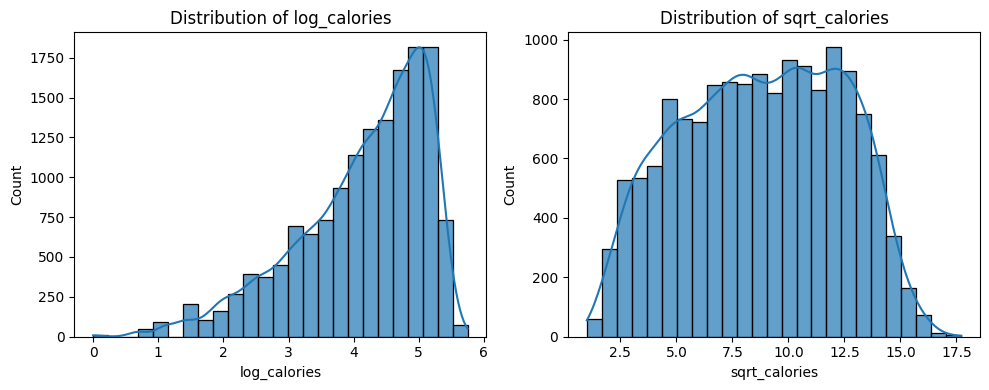

In [ ]:
target_column = ['log_calories','sqrt_calories' ]

plt.figure(figsize=(10,4))
for i, col in enumerate(target_column, 1):
  plt.subplot(1,2,i)
  sns.histplot(data = dataset, x = col, bins = 25, kde = True, edgecolor ='black', alpha = 0.7)
  plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [ ]:
# we won't be using log calories.
# practice tranformation with boxcoxx, see how far

In [ ]:
dataset.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories', 'BMI', 'BMI Category',
       'Age Groups', 'log_calories', 'sqrt_calories'],
      dtype='object')

In [ ]:
# dataset = dataset.drop(columns=['log_Calories'])

In [ ]:
# prediction
x = dataset.drop(columns=['User_ID', 'Calories', 'sqrt_calories', 'log_calories' ])
y = dataset['sqrt_calories']

In [ ]:
# split into train and split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# separate into num and cat cols

In [ ]:
# fit and evaluate model
for name, model in models.items():
  pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor ),
    ('model', model)
  ])

  # train the model
  pipeline.fit(x_train, y_train)

  # predict and evaluate

  # evaluate with rmse, and mae
  y_pred = pipeline.predict(x_test)
  mse = mean_squared_error(y_pred, y_test)
  rmse = root_mean_squared_error(y_pred, y_test)
  mae = mean_absolute_error(y_pred, y_test)
  score = r2_score(y_pred, y_test)

  print(f'{name}: Mse = {mse}, R-squared = {score},RMSE = {rmse}, MAE = {mae}' )
  # put it in a dictionary, and let it display in a tabular formula


Linear regression: Mse = 0.12479741733931209, R-squared = 0.9902443539378779,RMSE = 0.3532667792749724, MAE = 0.28048575787454744
decision tree: Mse = 0.06884128949701876, R-squared = 0.9946650311405895,RMSE = 0.26237623653261505, MAE = 0.18714986655783558
random forest: Mse = 0.019360032117542746, R-squared = 0.9984922748061849,RMSE = 0.1391403324616653, MAE = 0.09792322655154645
 Gradient Boost: Mse = 0.02661749064434134, R-squared = 0.9979235671802281,RMSE = 0.16314867650196044, MAE = 0.12108136899683135


In [ ]:
# use best model
final_model = GradientBoostingRegressor(random_state=42)

# fit and evaluate model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor ),
    ('model', final_model)
  ])

  # train the model
pipeline.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp', 'BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'BMI Category',
                                                   'Age Groups'])])),
                ('model', GradientBoostingRegressor(random_state=42))])

In [ ]:

  # predict and evaluate
  # evaluate with rmse, and mae
y_pred = pipeline.predict(x_test)
mse = mean_squared_error(y_pred, y_test)
rmse = root_mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
score = r2_score(y_pred, y_test)

print(f'{name}: Mse = {mse}, R-squared = {score},RMSE = {rmse}, MAE = {mae}' )


 Gradient Boost: Mse = 0.026617490644341317, R-squared = 0.9979235671802281,RMSE = 0.16314867650196038, MAE = 0.12108136899683128


### Feature Importance

In [ ]:
final_model.fit(preprocessor.transform(x_train), y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
list[preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_cols)]

list[array(['Gender_female', 'Gender_male', 'BMI Category_Normal Weight',
       'BMI Category_Overweight', 'BMI Category_None', 'Age Groups_Adult',
       'Age Groups_Senior Adult'], dtype=object)]

In [ ]:
feature_names = (num_cols + list(preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_cols)))

In [ ]:
feature_names

['Age',
 'Height',
 'Weight',
 'Duration',
 'Heart_Rate',
 'Body_Temp',
 'BMI',
 'Gender_female',
 'Gender_male',
 'BMI Category_Normal Weight',
 'BMI Category_Overweight',
 'BMI Category_None',
 'Age Groups_Adult',
 'Age Groups_Senior Adult']

In [ ]:
importance = final_model.feature_importances_
importance

array([1.87749184e-02, 4.94317921e-06, 2.34552156e-03, 8.76943810e-01,
       9.83178791e-02, 2.90745128e-05, 7.67834994e-05, 1.77658357e-03,
       1.72910715e-03, 0.00000000e+00, 5.14970915e-07, 0.00000000e+00,
       0.00000000e+00, 8.64198885e-07])

In [ ]:
sort =np.argsort(importance)[::-1]

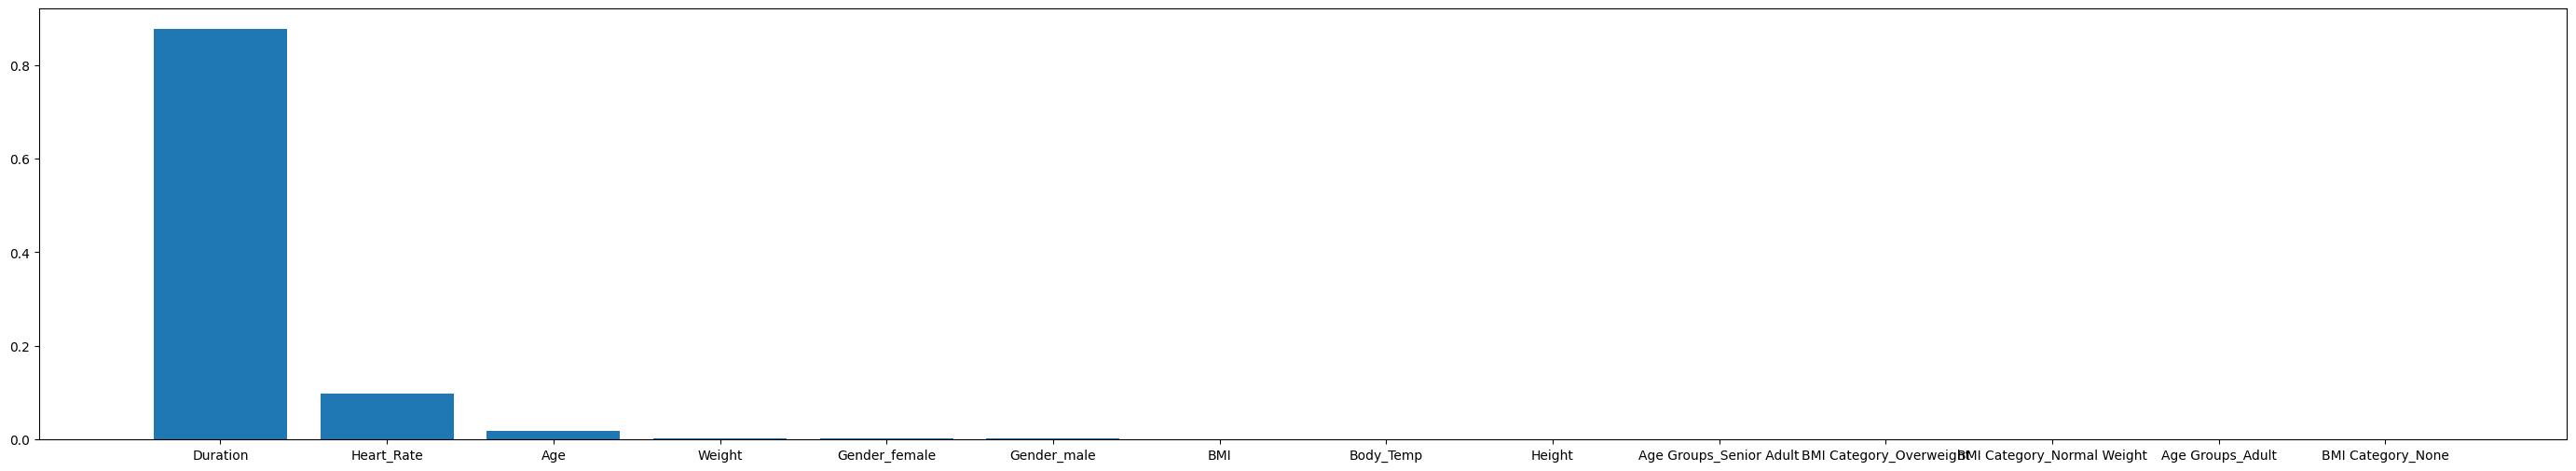

In [ ]:
plt.figure(figsize=(35,6))
plt.bar(range(len(importance)), importance[sort] )
plt.xticks(range(len(importance)), np.array(feature_names)[sort])
plt.show()

In [ ]:
# this means the duration of the exercise, contributes significantly to how much calorie would be burned
# the feature importance tells what column is significant for the model

In [ ]:
# use a scatter plot to see the relationshio between duration and calorie

### Test & Save Model

In [ ]:
import joblib

In [ ]:
pipeline_deploy = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state = 42))
])

In [ ]:
# fit it on the whole dataset
pipeline_deploy.fit(x,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp', 'BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'BMI Category',
                                                   'Age Groups'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [ ]:
# save model
joblib.dump(pipeline_deploy, 'calorie_predictor.pkl', compress=True)

# its quite large, you can save it and compress it next time hm?

['calorie_predictor.pkl']

In [ ]:
import sklearn
print(sklearn.__version__)

1.6.1


In [ ]:
# shutdown kernel. restart

#### Test with New Data

In [ ]:
# new data
# 'User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
#        'Heart_Rate', 'Body_Temp', 'Calories', 'BMI', 'BMI Category',
#        'Age Groups', 'log_calories', 'sqrt_calories'

data = {
    'Gender': ['female'],
    'Age': [20],

    'Height': [166],
    'Weight': [60],
    'Duration': [14],
    'Heart_Rate': [94],
    'Body_Temp': [40.3]
}



 add bmi, bmi category, age_groups with feature engineering



In [ ]:
# bmi
data['BMI'] = data['Weight'][0]/(data['Height'][0]/100)**2


In [ ]:
# bmi category
def bmi_category (BMI):
  if BMI <= 18.5:
    return 'Underweight'
  elif BMI >= 18.6 and BMI <= 24.9:
    return 'Normal Weight'
  elif BMI >= 25 and BMI <= 30:
    return 'Overweight'
  elif BMI >= 30.1:
    return 'Obese'

In [ ]:
data['BMI Category'] = bmi_category(data['BMI'])

In [ ]:
# age group
def age_group(age):
  if age[0] <= 12:
    return 'Child'
  elif 13 <= age[0] <= 18:
     return 'Adolescence'
  elif 19 <= age[0] <= 59:
    return 'Adult'
  else:
    return 'Senior Adult'

data['Age Groups'] = age_group(data['Age'])

In [ ]:
# load saved model
import joblib
import pandas as pd
import numpy as np

model = joblib.load('calore_predictor.pkl')

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,BMI,BMI Category,Age Groups
0,female,20,166,60,14,94,40.3,21.773842,Normal Weight,Adult


In [ ]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp', 'BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'BMI Category',
                                                   'Age Groups'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [ ]:

# use model
calorie = model.predict(df)


In [ ]:
# yk we did the sqrt calorie thingy
prediction = np.square(calorie)

In [ ]:
prediction

array([66.42684396])

### Deployment Of Model
- with streamlit
- with flask api
- with heroku

In [ ]:
!pip install streamlit --quiet

In [ ]:
%%writefile deploy.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# load saved model
model = joblib.load('calore_predictor.pkl')

# streamlit interface title
st.title('Calorie Burn Predictor')

# accept user input

# 'Gender', 'Age', 'Height', 'Weight', 'Duration',
#        'Heart_Rate', 'Body_Temp', 'Calories', 'BMI', 'BMI Category',
#        'Age Groups',

gender = st.selectbox( "Gender", ['male', 'female'])
age = st.slider("Age", 10, 100, 20)
height = st.number_input("Height (cm)", 100, 250, 160)
weight = st.number_input("Weight (kg)", 20, 200, 60)
duration = st.slider("Duration (mins)", 1, 180, 30)
heart_rate = st.slider("Heart Rate (bpm)", 40, 200, 80)
body_temp = st.slider("Body Temperature (°C)", 35.0, 42.0, 37.0)
bmi = weight / ((height / 100) ** 2)
bmi_category = 'Normal' if 18.5 <= bmi < 24.9 else 'Overweight' if bmi >= 25 else 'Underweight'
age_groups = 'Child' if age < 12 else 'Adolescence' if age < 19 else 'Adult' if age < 60 else 'Senior Adult'


# predict button
if st.button("Predict Calories Burned"):
    data = {
        "Gender": gender,
        "Age": age,
        "Height": height,
        "Weight": weight,
        "Duration": duration,
        "Heart_Rate": heart_rate,
        "Body_Temp": body_temp,
        "BMI": bmi,
        "BMI Category": bmi_category,
        "Age Groups": age_groups
    }
    # convert to dataframe
    df = pd.DataFrame(data)

    # predict model
    calorie = model.predict(df)
    prediction = np.sqrt(calorie)


    st.success(f'Estimated Calories Burned: {prediction[0]:.2f} kcal')


Overwriting deploy.py


In [ ]:

# deploy with github & streamlit cloud
%%writefile requirements.txt
pandas
numpy
joblib
sklearn


Overwriting requirements.txt


<!-- Write in Spyder notebook/vs code
 -->